<a href="https://colab.research.google.com/github/KosukhaOlexandr/reactions_prediction/blob/main/reactions_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

with open('/content/drive/MyDrive/reaction_prediction/concatenated_pos_neg.csv') as f:
  data = pd.read_csv(f, index_col = 0)

In [ ]:
data

,msg_text,reaction_type
0,чий борщ у п’ятницю 1 липня юнеско вирішить до...,1
1,зруйнований міст у демидові на київщині планую...,1
2,безперечно головне слово сьогодні зміїний мабу...,1
3,прокремлівське видання общественная служба нов...,1
4,продовжується відвантаження боєприпасів продов...,1
...,...,...
32378,перша леді олена зеленська та прем єр міністр ...,1
32379,українські захисники поцілили у військову коме...,1
32380,росіяни обстріляли заес пошкоджено обладнання ...,0
32381,тсн ua пропонує дізнатися головні події ночі я...,1


#Naive Bayes

##Count Vectorizer

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
bow = count_vec.fit_transform(data.msg_text)

X = bow
Y = data.reaction_type

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(X, Y, test_size = 0.30, stratify = Y, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_cv = MultinomialNB(alpha = 0.01).fit(X_train_cv, Y_train_cv)

In [ ]:
Y_pred_test = nb_cv.predict(X_test_cv)
Y_pred_train = nb_cv.predict(X_train_cv)

In [ ]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_cv, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_cv, Y_pred_train))

Test set accuracy: 0.7965002573340195
Train set accuracy: 0.9449885300864656


In [ ]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_cv, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_cv, Y_pred_train))

Test set F1 score: 0.8364358401588483
Train set F1 score: 0.9550776324795562


##TF-IDF Vectorizer

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vec = TfidfVectorizer()
bow_ti = tf_idf_vec.fit_transform(data.msg_text)
#bow_ti = np.array(bow_ti.todense())
bow_ti

<32383x89653 sparse matrix of type '<class 'numpy.float64'>'
	with 1161146 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = bow_ti
Y = data.reaction_type

X_train_ti, X_test_ti, Y_train_ti, Y_test_ti = train_test_split(X, Y, test_size = 0.30, stratify = Y, random_state = 42)

nb_tf_idf = MultinomialNB(alpha = 0.01).fit(X_train_ti, Y_train_ti)

In [ ]:
Y_pred_test = nb_tf_idf.predict(X_test_ti)
Y_pred_train = nb_tf_idf.predict(X_train_ti)

In [ ]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_ti, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_ti, Y_pred_train))

Test set accuracy: 0.8090581574884199
Train set accuracy: 0.956546673725075


In [ ]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_ti, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_ti, Y_pred_train))

Test set F1 score: 0.8529994452809256
Train set F1 score: 0.9652103274114365


#Misscalssified analysis

In [ ]:
X_test_ser = pd.Series(tf_idf_vec.inverse_transform(X_test_ti))

In [ ]:
Y_test_ti.reset_index(drop = True).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))]

1       1
9       0
10      0
11      1
13      0
       ..
9683    1
9690    0
9691    1
9698    1
9712    0
Name: reaction_type, Length: 1855, dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)
misclass = pd.concat([X_test_ser.loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))],
          Y_test_ti.reset_index(drop = True).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))],
          pd.Series(Y_pred_test).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))]], axis = 1)
misclass.columns = ['text', 'true_reaction', 'pred_reaction']
misclass

,text,true_reaction,pred_reaction
1,"[чати, повідомляла, запусків, саперів, чують, моніторингові, київщини, зафіксували, вибухи, ймовірно, жителі, робота, яку, ова, ракет, що, не, про]",1,0
9,"[mohajer, вкрасти, shahed, менших, тегерана, ірану, літаком, виготовити, 136, іран, nlaw, доправила, західне, 140, news, sky, схоже, передав, javelin, відправила, stinger, безпілотних, західну, аеропорт, технології, серпня, 160, потрібне, 131, дрони, євро, таємно, обмін, озброєння, комплекси, зброю, безпілотників, серед, 20, апаратів, літальних, понад, 100, військовим, шість, 60, млн, росія, яких, щоб, даними, щось, видання, за, на, та, рф]",0,1
10,"[риженко, правого, лівий, берег, схеми, грабують, вивозять, берега, костянтин, службовий, херсонський, херсон, наближення, цивільний, дніпра, відчувають, особового, складу, транспорт, показали, переміщення, все, повідомив, окупанти, знімки, зокрема, часом, тим, зсу, супутникові, можуть, це, техніки, журналіст, що, на, та, про]",0,1
11,[черкаси],1,0
13,"[заступили, чаес, змінитись, 211, технічне, психологічну, ремонт, фізичну, втому, зміну, захопленої, проводити, персонал, новини, працюють, майже, магате, напередодні, вторгнення, обслуговування, станції, останні, безперервно, людей, повідомили, уже, російського, можуть, ua, тсн, youtube, більше, через, може, які, не, тижні, три, на, та]",0,1
...,...,...,...
9683,"[богатирській, проспекті, завершують, оболоні, домівки, лобановського, солом, мешканці, кличко, віталій, оновлені, пошкоджених, києва, відновлення, янському, повертаються, будинків, мер, вулиці, повідомив, столиці, районі, на, вже, та]",1,0
9690,"[влучній, стовпами, оповите, надзусиллями, розбитий, стрілецькі, нескорений, зупиняють, розривів, шкодують, стійкості, піхоти, цілодобово, артилеристів, запеклі, диму, важких, насамперед, захопити, точаться, бої, донецької, снарядів, міни, українським, терористів, снаряди, сюжеті, околицях, бахмут, йдеться, аби, залишається, роботі, атаки, бійці, людей, окупанти, завдяки, зсу, області, але, тсн, місто, ракети, техніки, після, російський, тільки, не, на, та]",0,1
9691,"[єйську, росзмі, літака, госпіталізовано, падіння, загинуло, 15, унаслідок, житловий, будинок, людей, на]",1,0
9698,"[погодніх, грозу, прогнозують, погіршення, київській, умов, попередили, жителів, києву, 11, столиці, області, по, сьогодні, та, про, липня]",1,0


In [ ]:
Y_test_ti[Y_test_ti == 1].shape

(6035,)

In [ ]:
Y_test_ti.shape

(9715,)

In [ ]:
misclass.loc[(misclass.true_reaction == 1) & (misclass.pred_reaction == 0)].shape

(653, 3)

#SVC

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = bow_ti
Y = data.reaction_type

svc_tf_idf = make_pipeline(StandardScaler(with_mean=False), SVC(C = 1, gamma='auto'))
svc_tf_idf.fit(X_train_ti, Y_train_ti)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=1, gamma='auto'))])

In [ ]:
Y_pred_test = svc_tf_idf.predict(X_test_ti)
Y_pred_train = svc_tf_idf.predict(X_train_ti)

In [ ]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_ti, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_ti, Y_pred_train))

Test set accuracy: 0.7930005146680391
Train set accuracy: 0.977810128815952


In [ ]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_ti, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_ti, Y_pred_train))

Test set F1 score: 0.8539684844964055
Train set F1 score: 0.9823391032618237


In [ ]:
svc_cv = make_pipeline(StandardScaler(with_mean=False), SVC(C = 1, gamma='auto'))
svc_cv.fit(X_train_cv, Y_train_cv)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=1, gamma='auto'))])

In [ ]:
Y_pred_test = svc_cv.predict(X_test_cv)
Y_pred_train = svc_cv.predict(X_train_cv)

In [ ]:
print('Test set accuracy:', accuracy_score(Y_test_cv, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_cv, Y_pred_train))

print('Test set F1 score:', f1_score(Y_test_cv, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_cv, Y_pred_train))

Test set accuracy: 0.7924858466289243
Train set accuracy: 0.9578701252867479
Test set F1 score: 0.8539553752535497
Train set F1 score: 0.9670177862199965


#ROC

So now we have 4 models:
- nb_cv
- nb_tf_idf
- svc_cv
- svc_tf_idf


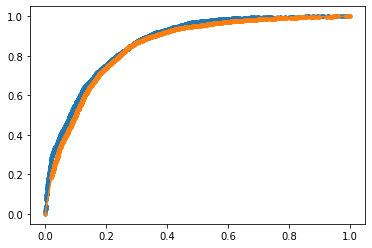

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

nb_cv_score = nb_cv.predict_proba(X_test_cv)
nb_tf_idf_score = nb_tf_idf.predict_proba(X_test_ti)
#svc_cv_score = svc_cv.predict_proba(X_test_cv)
#svc_tf_idf_score = svc_tf_idf.predict_proba(X_test_ti)

fpr_nb_cv_gnb, tpr_nb_cv_gnb, thresholds_gnb = roc_curve(Y_test_cv, nb_cv_score[:, 1])
fpr_nb_tf_idf, tpr_nb_tf_idf, _ = roc_curve(Y_test_ti, nb_tf_idf_score[:, 1])
#fpr_svc_cv, tpr_svc_cv, _ = roc_curve(Y_test_cv, svc_cv_score[:, 1])
#fpr_svc_tf_idf, tpr_svc_tf_idf, _ = roc_curve(Y_test_ti, svc_tf_idf_score[:, 1]) 

#plt.plot(fpr_svc_cv, tpr_svc_cv, marker='.', label = 'svc_cv')
#plt.plot(fpr_svc_tf_idf, tpr_svc_tf_idf, marker='.', label = 'svc_tf_idf')
plt.plot(fpr_nb_tf_idf, tpr_nb_tf_idf, marker='.', label='nb_ti')
plt.plot(fpr_nb_cv_gnb, tpr_nb_cv_gnb, marker='.', label='nb_cv')


# Choosing and saving the best model

The best model so far is Naive Bayes with TF-IDF vectorization and f1_score 0.86

In [ ]:
# we need to save vectorizer and fitter
from joblib import dump, load

dump(tf_idf_vec, '/content/drive/My Drive/reaction_prediction/vectorizer.joblib')
dump(nb_tf_idf, '/content/drive/My Drive/reaction_prediction/model.joblib')

# saving training set
data.to_csv('/content/drive/My Drive/reaction_prediction/train_set.csv')